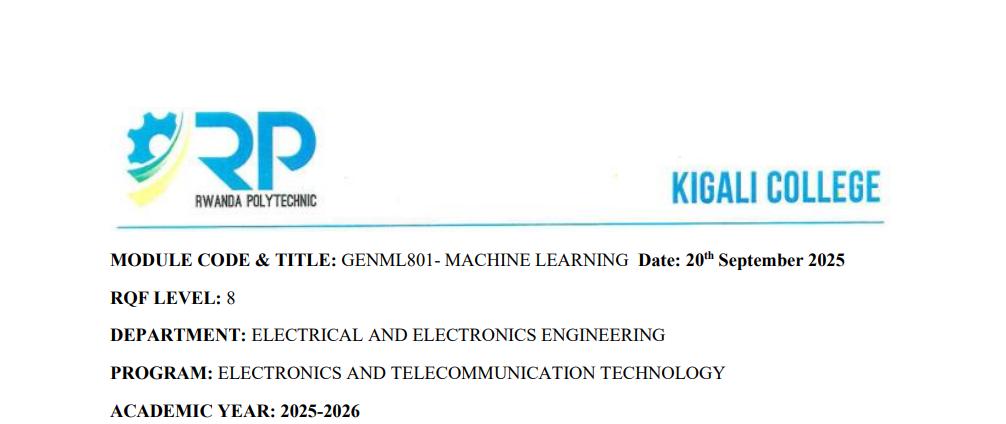

# names:Mukeshimana Tumaine
# reg no:25rp21087
# Assignment

In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset

In [173]:
df = pd.read_csv("smart home energy consumption large.csv")


In [174]:
print (df)

       Home ID    Appliance Type  Energy Consumption (kWh)   Time        Date  \
0           94            Fridge                      0.20  21:12  2023-12-02   
1          435              Oven                      0.23  20:11  2023-08-06   
2          466        Dishwasher                      0.32  06:39  2023-11-21   
3          496            Heater                      3.92  21:56  2023-01-21   
4          137         Microwave                      0.44  04:31  2023-08-26   
...        ...               ...                       ...    ...         ...   
99995      124         Microwave                      0.42  09:56  2023-09-28   
99996      184          Computer                      0.71  12:48  2023-05-27   
99997      101        Dishwasher                      0.25  05:45  2023-02-18   
99998      423  Air Conditioning                      2.69  12:39  2023-04-20   
99999      429            Fridge                      0.37  18:46  2023-02-27   

       Outdoor Temperature 

# Exploratory Data Analysis

In [175]:
print("Dataset Shape:", df.shape)
print(df.head())
print(df.describe())

Dataset Shape: (100000, 8)
   Home ID Appliance Type  Energy Consumption (kWh)   Time        Date  \
0       94         Fridge                      0.20  21:12  2023-12-02   
1      435           Oven                      0.23  20:11  2023-08-06   
2      466     Dishwasher                      0.32  06:39  2023-11-21   
3      496         Heater                      3.92  21:56  2023-01-21   
4      137      Microwave                      0.44  04:31  2023-08-26   

   Outdoor Temperature (°C)  Season  Household Size  
0                      -1.0    Fall               2  
1                      31.1  Summer               5  
2                      21.3    Fall               3  
3                      -4.2  Winter               1  
4                      34.5  Summer               5  
             Home ID  Energy Consumption (kWh)  Outdoor Temperature (°C)  \
count  100000.000000             100000.000000             100000.000000   
mean      250.374980                  1.499952      

 # Univariate: Distribution of energy consumption

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


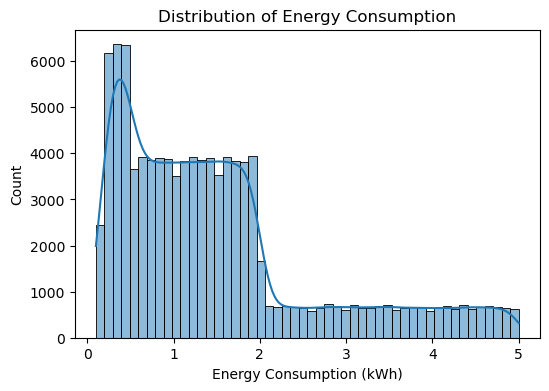

In [176]:
plt.figure(figsize=(6,4))
sns.histplot(df["Energy Consumption (kWh)"], bins=50, kde=True)
plt.title("Distribution of Energy Consumption")
plt.show()

# Bivariate: Appliance vs consumption

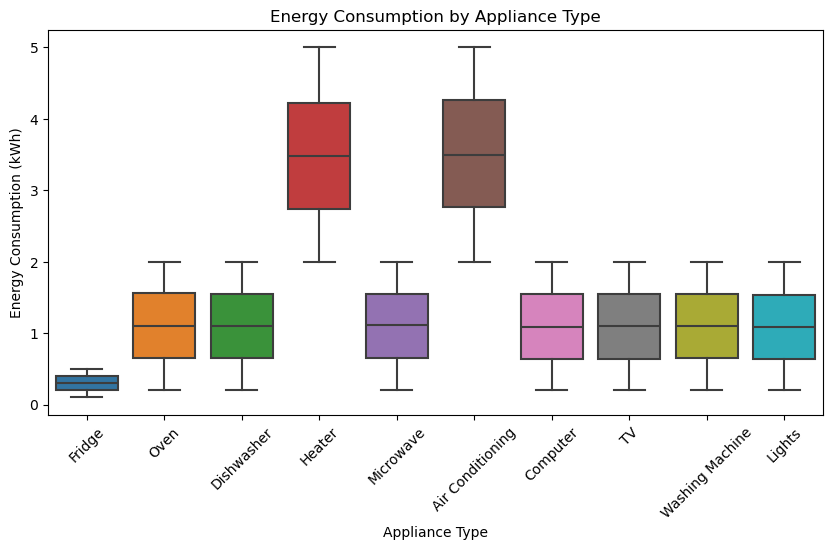

In [177]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Appliance Type", y="Energy Consumption (kWh)", data=df)
plt.xticks(rotation=45)
plt.title("Energy Consumption by Appliance Type")
plt.show()

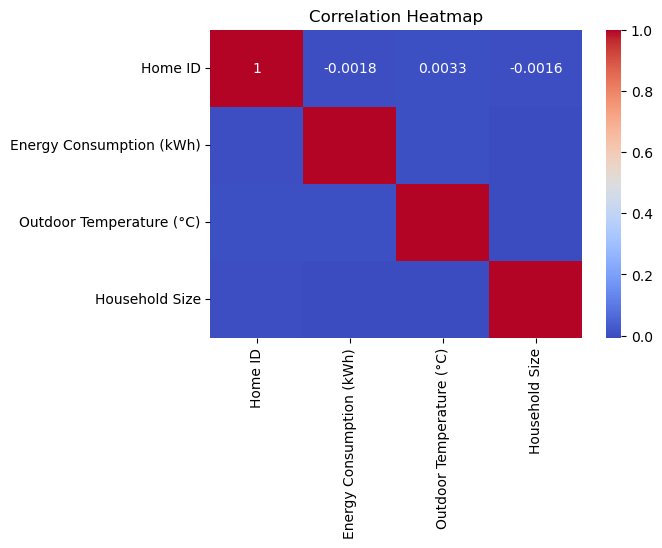

In [178]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [179]:
# Convert Date and Time
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour
df.drop(columns=["Date","Time"], inplace=True)

In [185]:
# Encode categorical features
le_appliance = LabelEncoder()
df["Appliance Type"] = le_appliance.fit_transform(df["Appliance Type"])

le_season = LabelEncoder(
df["Season"] = le_season.fit_transform(df["Season"])

SyntaxError: '(' was never closed (3301642478.py, line 5)

In [ ]:
# Define features and target
X = df.drop(columns=["Energy Consumption (kWh)", "Home ID"])
y = df["Energy Consumption (kWh)"]

In [ ]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 # Train & Evaluate Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# Save model

In [184]:
joblib.dump(model, "energy_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le_season, "le_season.joblib")

['le_season.joblib']

# Deployment with Streamlit

In [ ]:
joblib.dump(scaler, "scaler.joblib")

In [ ]:
joblib.dump(model, "energy_model.joblib")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Example: encode appliance names
le_appliance = LabelEncoder()
y_train_encoded = le_appliance.fit_transform(y_train)

# Save encoder
joblib.dump(le_appliance, "le_appliance.joblib")
